C:\Users\lio22\AppData\Local\Temp\ipykernel_1756\1620453399.py:13: FutureWarning: convert_float is deprecated and will be removed in a future version.
  df = pd.read_excel("File\\남북한발전전력량.xlsx", engine="openpyxl", convert_float=True)


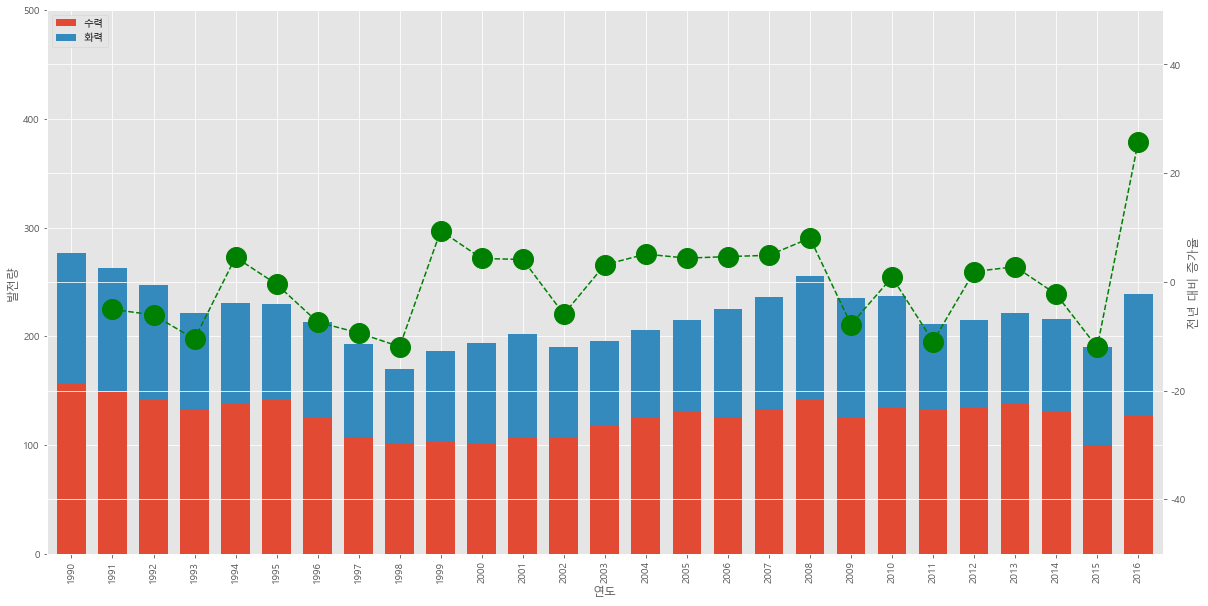

In [55]:
import pandas as pd 
import matplotlib.pyplot as plt 

from matplotlib import font_manager, rc 

font_path = "C:\\Windows\\Fonts\\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use("ggplot")
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_excel("File\\남북한발전전력량.xlsx", engine="openpyxl", convert_float=True)
# df = df.fillna(method="ffill")
df = df[5:9]
df.rename({"전력량 (억㎾h)":"전력량"}, axis="columns", inplace=True)
df.drop("전력량", axis=1, inplace=True)
df.rename({"발전 전력별": "발전 종류"}, axis="columns", inplace=True)
df.set_index("발전 종류", inplace=True)
df = df.T
df = df.rename(columns={"합계":"총발전량"})
df["총발전량-1년"] = df["총발전량"].shift(1)
df["증감율"] = (((df["총발전량"].astype(float))/ df["총발전량-1년"])- 1) * 100


ax1 = df[["수력", "화력"]].plot(kind="bar", figsize=(20,10), width=0.7, stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20, color='green', label='전년대비 증감율(%)')  
ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel("연도")
ax1.set_ylabel("발전량")
ax2.set_ylabel("전년 대비 증가율")
ax1.legend(loc="upper left")
plt.show()
# df = df.loc[5:9]

# df.drop("전력량 (억kWh)", axis="columns", inplace=True)
# df.set_index("발전 전력별", inplace=True)


C:\Users\lio22\AppData\Local\Temp\ipykernel_1756\2732118188.py:15: FutureWarning: convert_float is deprecated and will be removed in a future version.
  df = pd.read_excel('File\\남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)


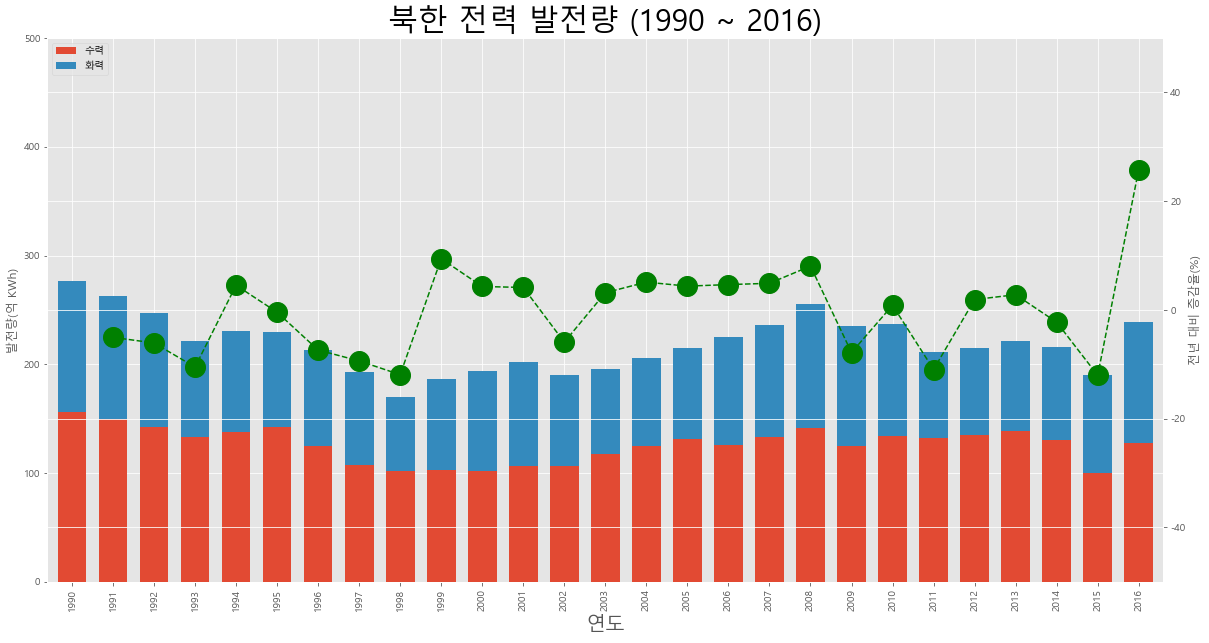

In [50]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:\\Windows\\Fonts\\malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')   # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('File\\남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T 

# 증감율(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100      

# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)  
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20, 
         color='green', label='전년대비 증감율(%)')  

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')

plt.show()